# Comprehensive EDA with Nice Graphs
<a id="start"></a>
Welcome to this comprehensive exploratory data analysis (EDA) and visualization of the Titanic dataset. My goal is to uncover insights into the factors that contributed to the survival of certain passengers aboard the ill-fated RMS Titanic. I'll leverage statistical techniques and nice visualizations to understand the underlying patterns within the data.

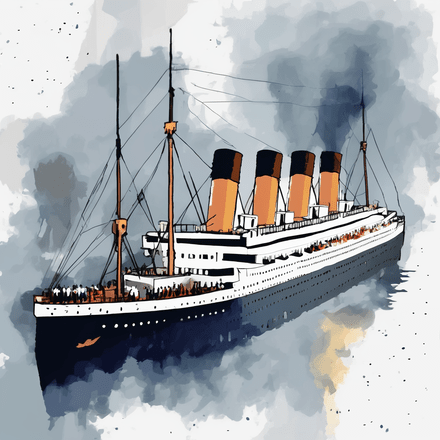

| Attribute | Details |
|-----------|---------|
| **Author** | **`Muhammad Bilal Khan`** |
| **Kaggle** | [![Kaggle Badge](https://img.shields.io/badge/Kaggle-035a7d?style=for-the-badge&logo=kaggle&logoColor=white)](https://www.kaggle.com/devbilalkhan) |
| **Twitter** | [![Twitter Badge](https://img.shields.io/badge/Twitter-%23000000.svg?style=for-the-badge&logo=Twitter&logoColor=white)](https://twitter.com/devbilalkhan) |
| **GitHub** | [![GitHub Badge](https://img.shields.io/badge/github-%23121011.svg?style=for-the-badge&logo=github&logoColor=white)](https://github.com/devbilalkhan) |
| **Email** | [![Outlook Badge](https://img.shields.io/badge/Microsoft_Outlook-0078D4?style=for-the-badge&logo=microsoft-outlook&logoColor=white)](mailto:bilal.khan@live.com) |

## Dataset Overview

The Titanic dataset is a classic and very famous dataset used for machine learning and data analysis. It contains information about the passengers, formatted into two sets: training and test data. The training set includes passenger information along with the survival outcome, which we'll use to train our machine learning models. The test set contains passenger information but without the survival outcome, and it's used to test the performance of our trained models.

Here are the key columns in the dataset along with a brief description of each:

- `Survived`: Indicates if a passenger survived (1) or not (0).
- `Pclass`: Ticket class, a proxy for socio-economic status (1 = 1st, 2 = 2nd, 3 = 3rd).
- `Name`: Passenger's name.
- `Sex`: Passenger's sex.
- `Age`: Passenger's age in years.
- `SibSp`: Number of siblings/spouses aboard the Titanic.
- `Parch`: Number of parents/children aboard the Titanic.
- `Ticket`: Ticket number.
- `Fare`: Passenger fare.
- `Cabin`: Cabin number.
- `Embarked`: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

## Project Goal

My primary objective is to analyze the Titanic dataset to understand which factors were most influential in predicting the survival of passengers. I aim to answer questions such as "Did women and children have higher survival rates?" and "How did the passenger class affect the survival chances?" By the end of this notebook, we will have a detailed visual and quantitative understanding of the Titanic's passenger data.

## Acknowledgements

I would like to acknowledge the creators of the Titanic dataset for making it publicly available and a special thanks to the Kaggle platform for hosting the Titanic Machine Learning competition. 

I would like to extend my gratitude to [Gabriel Preda](https://www.kaggle.com/gpreda) for his invaluable contributions to the analysis of the Titanic dataset. Gabriel's notebook has been a guiding resource, demonstrating the power of thoughtful data analysis.

[Navigate to Conclusion ➡️](#conclusion)

# 1. Abstract
This notebook presents a detailed exploratory data analysis of the Titanic dataset, which includes both training and test datasets. The training dataset is composed of 891 entries and 12 attributes, including both numerical and categorical columns. The statistical summary highlights key observations about survival rates, passenger classes, and fares, as well as correlations between different variables. The analysis also identifies missing data within the dataset and its potential impact on the study. A particular focus is given to the titles of passengers and their corresponding survival rates, revealing social distinctions that played a role in survival outcomes.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from data_analysis_utils import inspect_frequent_values, inspect_missing_values, inspect_unique_values, display_custom_palette
import warnings
warnings.filterwarnings('ignore')


# 2. What Secrets Lie Within Our Data?

In [ ]:
train_ds = pd.read_csv('data/train.csv')
test_ds = pd.read_csv('data/titanic/test.csv')

## 2.1. Train

In [ ]:
train_ds.sample(5)

## 2.2. Test

In [ ]:
test_ds.sample(5)

In [ ]:
train_ds.info()

## 2.3. Observation - Summary Information 
- The train dataset contains a total of **12 columns**, of which there are **7 numerical columns** (`PassengerId`, `Survived`, `Pclass`, `Age`, `SibSp`, `Parch`, `Fare`) and **5 categorical columns** (`Name`, `Sex`, `Ticket`, `Cabin`, `Embarked`).

- The shape of the `train_ds` DataFrame is **891 rows** and **12 columns**, indicating that there are 891 entries, each with 12 attributes.

In [ ]:
train_ds.describe()

## Observation - Statistical Summary of Train dataset
- **`Survived`** is a binary indicator where **`1`** represents survival and **`0`** represents non-survival. The mean survival rate is **`0.383838`** (approximately **`38.38%`**), suggesting that less than half of the passengers survived.

- **`Pclass`** represents the class of travel with a lower number indicating a higher class. The passengers are spread across three classes, with a mean **`Pclass`** of **`2.308642`**, implying that most passengers are in the second and third classes.

- The **`Age`** of passengers has a mean of **`29.699118`** years, with the youngest being **`0.42`** years old (likely a few months old) and the oldest at **`80`** years. The age data appears to be incomplete, with **`714`** out of **`891`** entries having non-null values.

# 2. What Will a Closer Look at Our Data Reveal?
Let's inspect our data closely and find out!

## 2.1. Missing Values - Train

In [ ]:
missing_values_train = inspect_missing_values(train_ds)
missing_values_train

## 2.2. Missing Values - Test

In [ ]:
missing_values_test = inspect_missing_values(test_ds)
missing_values_test

## 2.3. Observations
### Missing Data Insights for Train Dataset

- **Missing Entries**: In the training dataset of 891 entries, several columns have missing values:
  - `Age` has **177 missing entries (19.87%)**.
  - `Cabin` has **687 missing entries (77.1%)**.
  - `Embarked` has **2 missing entries (0.22%)**.
  
### Missing Data Insights for Test Dataset

- **Missing Entries**: In the training dataset of 418 entries, several columns have missing values:
  - `Age` has **86 missing entries (20.57%)**.
  - `Cabin` has **327 missing entries (78.23%)**.
  - `Fare` has **1 missing entries (0.24%)**.

## 2.4. Plotting Missing Values

In [ ]:
#palette_colors = ["#FF40D1", "#19D4FF", "#ACF626", "#049DD9", "#F27B35"]
palette_colors = ["#461FFF", "#32FFD9", "#002BF5", "#2B99FF", "#1CCBE8"]
display_custom_palette(palette_colors)

In [ ]:
train_ds['Source'] = 'train'
test_ds['Source'] = 'test'

In [ ]:
df = pd.concat([train_ds, test_ds], axis=0)

In [ ]:
melted_df = pd.melt(df, id_vars='Source', value_vars=['Cabin', 'Age', 'Embarked'], var_name='column', value_name='is_missing')
melted_df['missing'] = melted_df['is_missing'].isnull()
missing_data_df = melted_df[melted_df['missing']]


plt.figure(figsize=(8, 4))
sns.countplot(data=missing_data_df, x='column', hue='Source', palette=palette_colors)


plt.grid(color="black", linestyle="-.", linewidth=0.5, axis='y', alpha=0.5)
plt.title('Missing Values Count in Train and Test Dataset', size=18)
plt.xlabel('Columns with Missing Values', size=15)
plt.ylabel('Count of Missing Values', size=15)

plt.legend(title='Source')
plt.tight_layout() 
plt.show()

# 3. What Stories Do Individual Variables Tell?

## Univariate Analysis

In [ ]:
def plot_countplot(df, column, first_title, second_title=None, hue="Source"):    
    if second_title is not None:
       
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
        total_axes = 2
    else:     
        f, ax1 = plt.subplots(1, 1, figsize=(6, 4))
        total_axes = 1
    
    sns.countplot(x=column, data=df, hue="Survived", palette=palette_colors, ax=ax1)
    ax1.grid(color="black", linestyle="-.", linewidth=0.5, axis="y", alpha=0.5)
    ax1.set_title(f"Total Passengers / {first_title}")
    
    if total_axes == 2:
        sns.countplot(x=column, data=df, hue=hue, palette=palette_colors, ax=ax2)
        ax2.grid(color="black", linestyle="-.", linewidth=0.5, axis="y", alpha=0.5)
        ax2.set_title(f"Total Passengers / {second_title}")
    
    plt.show()  

## 3.1. Survival Distribution by Sex

These countplots displays the survival rate of passengers on the Titanic, separated by sex. It highlights potential differences in survival chances between males and females during the disaster in train and test datasets.

In [ ]:
plot_countplot(df, "Sex", "Sex vs Survived",  "Sex - Train Test Split")

In [ ]:
total_passengers_by_sex = df['Sex'].value_counts()
survivors_by_sex = df[df['Survived'] == 1]['Sex'].value_counts()
survival_rates_by_sex = survivors_by_sex / total_passengers_by_sex


print(f"Total passengers by sex:\n{total_passengers_by_sex}\n")
print(f"Survivors by sex:\n{survivors_by_sex}\n")
print(f"Survival rates by sex:\n{survival_rates_by_sex}")

## 3.2. Passenger Class vs. Survival Countplot

These visual representations compares the distribution of passengers across different classes with their survival outcome in train and test datasets. The plot emphasizes how passenger class may correlate with the likelihood of surviving the Titanic disaster.

In [ ]:
plot_countplot(df, "Pclass", "Pclass vs Survived",  "Pclass - Train Test Split")

## 3.3. Distribution of Passengers with Parents/Children Aboard

This countplot reveals the number of passengers traveling with their parents or children on the Titanic. It offers insights into family sizes and the prevalence of passengers who were not traveling alone.

In [ ]:
plot_countplot(df, "Parch", "Parents - Children aboard")

## 3.4. Age Distribution Comparison: Train/Test Split and Survival Outcome

The histograms provide a visual comparison of age distributions within the Titanic dataset. The left plot contrasts the age profiles of passengers in the training set with those in the test set, while the right plot differentiates between the ages of passengers who survived and those who perished.

In [ ]:
source = df["Source"].unique().tolist()
train = df.loc[df["Source"] == source[0], "Age"]
test = df.loc[df["Source"] == source[1], "Age"]

survived = df["Survived"].unique().tolist()
survived_yes = df.loc[df["Survived"] == survived[0], "Age"]
survived_no = df.loc[df["Survived"] == survived[1], "Age"]

f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))
g = sns.histplot(data=train,  color=palette_colors[0], ax=ax1, label="Train")
sns.histplot(data=test,  color=palette_colors[4], ax=ax1, label="Test")

sns.histplot(data=survived_yes,  color=palette_colors[2], ax=ax2, label="0")
sns.histplot(data=survived_no,  color=palette_colors[1], ax=ax2, label="1")

ax1.set_title("Number of passengers / Train Test split")
ax2.set_title("Number of passengers / Survived")

g.legend(title=source)
ax2.legend(title="Survived")
plt.show()


# 4. How Do Variables Interact and Influence Each Other?
## Multivariate Analysis

The following code performs feature extraction by creating new informative features—'title', 'FamilySize', 'IsAlone', and 'AgeGroup'—from existing data, which can be utilized for more in-depth multivariate analysis and visualization.

In [ ]:
df['title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

bins = [0, 12, 18, 60, np.inf]
labels = ['Child', 'Teenager', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)


## 4.1. Correlation Matrix

In [ ]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap=palette_colors, square=True, linewidths=.5)

plt.show()

## 4.1.1. Observation
1. **`Survived`** is negatively correlated with **`Pclass`** (-0.338), indicating higher-class passengers had a better chance of survival.
2. **`Fare`** is positively correlated with **`Survived`** (0.257), suggesting passengers who paid more had higher survival rates.
3. There is a strong negative correlation between **`Pclass`** and **`Fare`** (-0.559), meaning higher-class passengers typically paid more for their tickets.
4. **`Age`** is negatively correlated with **`Pclass`** (-0.408), indicating that passengers in higher classes tended to be older.
5. **`SibSp`** and **`Parch`** have a moderate positive correlation (0.374), implying that passengers with siblings or spouses on board were likely to also have parents or children aboard.
6. The correlation between **`Age`** and **`Survived`** is slightly negative (-0.077), suggesting that younger passengers had a slightly better chance of survival.

## 4.2. Title vs Survived Count Plot

In [ ]:
title_survived_ct = pd.crosstab(df['title'], df['Survived'])
title_survived_ct

In [ ]:
def plot_categorical_distribution(df, first_feature, hue, title):
    sns.set_style("whitegrid", {'axes.grid': True})
    plt.figure(figsize=(10, 8))
    sns.countplot(data=df, y=first_feature, hue=hue, palette=palette_colors)
    plt.title(title, size=18)
    plt.legend(loc='lower right', title=hue)
    plt.show()

plot_categorical_distribution(df, 'title', 'Survived', 'Title vs Survived Count Plot')

## 4.2.1 Observations
- **Master**: A notable survival rate for young boys, with more than half surviving (`23` out of `40`, ~`57.5%`).
- **Miss**: Unmarried women had a high survival rate, with a significant majority surviving (`127` out of `182`, ~`69.8%`).
- **Mr**: Married men had a notably low survival rate, with only a small fraction surviving (`81` out of `517`, ~`15.7%`).
- **Mrs**: Married women had a very high survival rate, with the majority surviving (`99` out of `125`, ~`79.2%`).

## 4.3. Passenger Class and Age Group Survival Distribution

In [ ]:
pd.crosstab([df['Pclass'], df['Survived']], df['AgeGroup']).plot(kind='bar', stacked=True, color=palette_colors)

In [ ]:
agegroup_pclass_survived_ct = pd.crosstab([df['Pclass'], df['Survived']], df['AgeGroup'])

agegroup_pclass_survived_ct

## 4.3.1. Observations
- **First Class Survival**: Higher survival rates for all age groups, particularly adults.
- **Second Class Children**: All children survived, which is a standout observation.
- **Teenagers**: Similar survival and fatality rates in the second class.
- **Third Class Outcomes**: Significantly higher fatalities across all age groups, with children being notably affected.
- **Adults**: Majority of the fatalities, especially in third class.
- **Seniors**: Lowest survival rates across all classes.

# 5. Conclusion
<a id="conclusion"></a>
Throughout this notebook, I have conducted an in-depth analysis of the Titanic dataset, uncovering insights into the catastrophe that unfolded over a century ago. My findings suggest that survival on the Titanic was not random, but rather significantly influenced by socio-economic factors such as passenger class and fare, in addition to demographic factors like age, sex, and family relationships.

Key takeaways include:
- Higher survival rates for women and children, as indicated by the titles 'Master', 'Miss', and 'Mrs'.
- A discernible negative correlation between passenger class and survival, with first-class passengers more likely to survive.
- The challenge of missing data in significant columns like 'Age' and 'Cabin', which I addressed to the best of my ability.

This analysis highlights the impact of social status and demographics on survival chances during maritime disasters. Looking ahead, I aim to focus on more accurately imputing missing values and perhaps enriching this dataset with additional external data to refine my predictions and deepen my insights.


#### Selected Kaggle Projects by [Me](https://www.kaggle.com/devbilalkhan):
Here are some of other Kaggle projects:
* [ML Heart Disease Detection - Random Forest](https://www.kaggle.com/code/devbilalkhan/ml-heart-disease-detection-random-forest)
* [Bank Churn Deep Learning](https://www.kaggle.com/code/devbilalkhan/bank-churn-deep-learning-0-88632)
* [Advanced Predictive Analysis - Heart Disease UCI](https://www.kaggle.com/code/devbilalkhan/ml-heart-disease-detection-random-forest)

[Go Back to Start ⬆️](#start)